In [1]:
# Séries Temporais

In [2]:
# import das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
base = pd.read_csv('./dados/AirPassengers.csv', sep = ',')
base.head()

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [5]:
# visualização do tipo de dados dos atributos
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [6]:
# Conversão dos atributos que estão no formato string para formato de data: ANO-MÊS
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('./dados/AirPassengers.csv', parse_dates = ['Month'],
                  index_col = 'Month',  date_parser = dateparse)
base.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [7]:
# Visualização do indice do dataframe
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [8]:
# criação da série temporal(ts)
ts = base['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [9]:
# visualização de um registro específico
ts[1]

118

In [12]:
# visualização por ano e mês
ts['1949-05']

Month
1949-05-01    121
Name: #Passengers, dtype: int64

In [13]:
# Visualização de data específica
ts[datetime(1955,12,1)]

278

In [14]:
# Visualização de intervalos
ts['1950-01-01':'1950-12-01']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [15]:
# Visualização de intervalos sem preencher a data de inicio
ts[:'1949-06-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
Name: #Passengers, dtype: int64

In [16]:
# visualização por ano
ts['1951']

Month
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
1951-07-01    199
1951-08-01    199
1951-09-01    184
1951-10-01    162
1951-11-01    146
1951-12-01    166
Name: #Passengers, dtype: int64

In [24]:
# valores máximos do indice
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [26]:
# valores minimos do indice
ts.index.min()

Timestamp('1949-01-01 00:00:00')

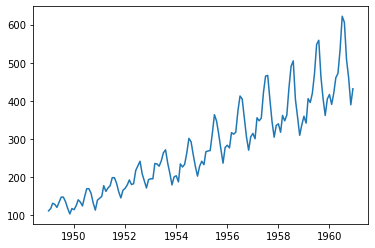

In [27]:
# visualização da serie temporal completa
plt.plot(ts)

In [29]:
# visualização por ano
ts_ano = ts.resample('A').sum()
ts_ano

Month
1949-12-31    1520
1950-12-31    1676
1951-12-31    2042
1952-12-31    2364
1953-12-31    2700
1954-12-31    2867
1955-12-31    3408
1956-12-31    3939
1957-12-31    4421
1958-12-31    4572
1959-12-31    5140
1960-12-31    5714
Freq: A-DEC, Name: #Passengers, dtype: int64

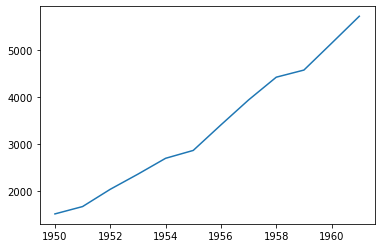

In [30]:
plt.plot(ts_ano)

In [31]:
# visualização por mês
ts_mes = ts.groupby([lambda x: x.month]).sum()
ts_mes

1     2901
2     2820
3     3242
4     3205
5     3262
6     3740
7     4216
8     4213
9     3629
10    3199
11    2794
12    3142
Name: #Passengers, dtype: int64

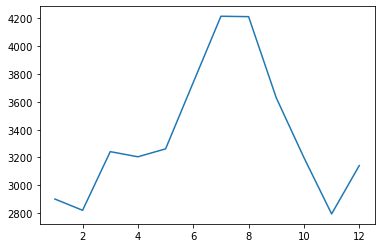

In [32]:
plt.plot(ts_mes)

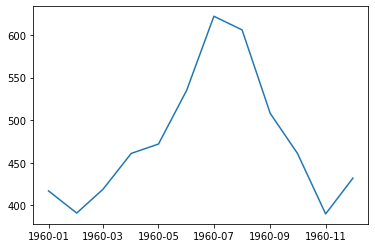

In [39]:
# visualização entre datas específicas
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas)